In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\MAPCO1720\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\MAPCO1720\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volu

In [4]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [5]:
nombres_clases = metadatos.features["label"].names

In [6]:
#Normalizacion
#0-255
#Transformar 0-255 0-1 (0=0, 255=1, 127=.5)

#Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes = imagenes/255
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en Cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

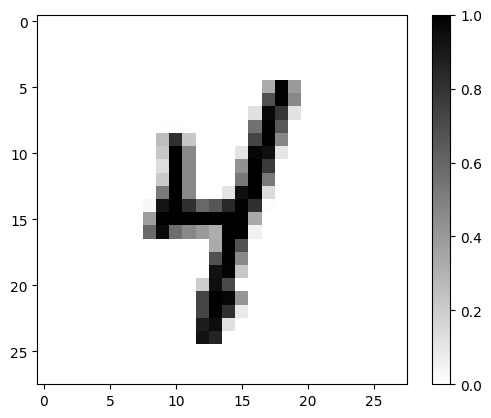

In [7]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

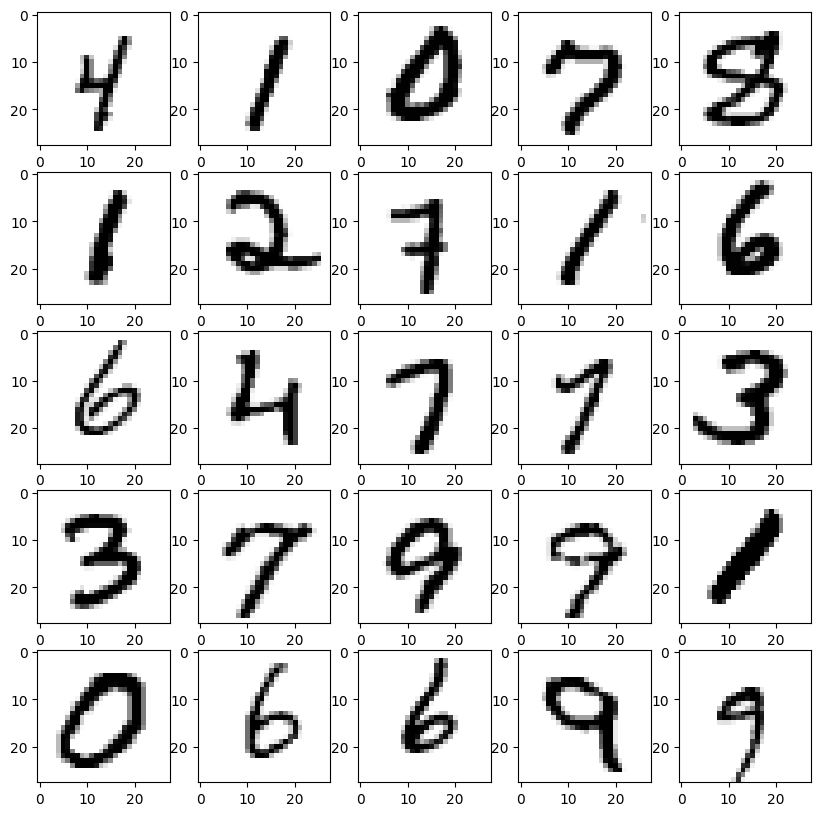

In [8]:
plt.figure(figsize=(10,10))
for i , (imagen, etiqueta) in enumerate (datos_entrenamiento.take(25)):
    plt.subplot(5,5, i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    

plt.show()

In [9]:
modelo = tf.keras.Sequential([
    #748 datos de entrada

    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 por que es blanco y negro
    
    #Capa oculta / Tener mas capas nos puede ayudar a aumentar
    #la precision si son datos mas complejos
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),

    #Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\MAPCO1720\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
modelo.compile(
    optimizer ="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics =["accuracy"]
)

In [11]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)



In [12]:
import math

#Entrenamiento
entrenamiento = modelo.fit(
    datos_entrenamiento, epochs= 10,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9147 - loss: 0.2965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9581 - loss: 0.1397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9692 - loss: 0.1034
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0710
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9816 - loss: 0.0582
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0542
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0443
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0409
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0339
